In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from scipy.optimize import minimize
%matplotlib inline

### Задание 1

Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [2]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

<b> a) </b> Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

In [22]:
def get_ugol(a, b):
    return np.dot(a,b)/( np.linalg.norm(a)*np.linalg.norm(b))

for num, vector in enumerate(raitings):
    dict_vect = {}
    for n, i in enumerate(raitings):
        if get_ugol(vector, i) < 0.9999999:
            dict_vect[get_ugol(vector, i)] = n
    print(f'user{num} and user{dict_vect[max(dict_vect.keys())]} со значением {max(dict_vect.keys()):.2f}')
    

user0 and user8 со значением 0.91
user1 and user4 со значением 0.87
user2 and user9 со значением 0.92
user3 and user9 со значением 0.86
user4 and user8 со значением 0.88
user5 and user9 со значением 0.86
user6 and user3 со значением 0.83
user7 and user5 со значением 0.84
user8 and user0 со значением 0.91
user9 and user2 со значением 0.92


In [18]:
from sklearn.metrics import pairwise_distances

correlation = pairwise_distances(raitings, metric = 'cosine')

for num, correl in enumerate(correlation):
    print(f"user{num} and user {list(correl).index(correl[correl!=0].min())} со значением {(1-correl[correl!=0].min()):.2f}")

user0 and user 8 со значением 0.91
user1 and user 4 со значением 0.87
user2 and user 9 со значением 0.92
user3 and user 9 со значением 0.86
user4 and user 8 со значением 0.88
user5 and user 9 со значением 0.86
user6 and user 3 со значением 0.83
user7 and user 5 со значением 0.84
user8 and user 0 со значением 0.91
user9 and user 2 со значением 0.92


<b> b) </b>Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов, до, скажем, 5-ти признаков, как вы это сделаете?

In [38]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
rating_comp = pca.fit_transform(raitings)

rating_comp

array([[-5.30986101,  1.92919845, -4.93300027,  2.70188013,  5.50497886],
       [ 2.87763403,  2.71659559,  1.40592782,  7.26325751, -4.50322291],
       [-4.94010408, -6.68861167, -0.94550184,  3.61556661, -0.68969272],
       [ 5.14939908, -6.28027284, -4.65978558,  1.09024004, -1.01471112],
       [-1.37488691,  7.54357985,  4.00834369,  2.1284001 , -0.16324949],
       [ 2.65341956, -3.77075601,  8.58430748, -1.46628319,  1.67401769],
       [ 8.61573944,  3.78603335, -4.02721027, -4.37582577, -3.13880277],
       [ 5.39658258, -1.0170466 ,  1.01456742, -1.89512837,  6.54883538],
       [-5.7843488 ,  5.29857107, -1.48083611, -3.71295542,  0.21312695],
       [-7.2835739 , -3.51729118,  1.03318766, -5.34915166, -4.43127987]])

### Задание 2

Вычислите производную $tg^2(sin(x) + cos(2x+3))$ в точке $x_0=1$ на python и на бумаге (просто подставить точку в производную и ничего не упрощать).

In [2]:
from sympy import diff, symbols, cos, sin, tan
from scipy.misc import derivative

In [9]:
x = symbols('x')
df = diff(tan(sin(x) + cos(2*x+3))**2)
df

2*(-2*sin(2*x + 3) + cos(x))*(tan(sin(x) + cos(2*x + 3))**2 + 1)*tan(sin(x) + cos(2*x + 3))

In [17]:
def f(x):
    return 2*(-2*np.sin(2*x+3)+np.cos(x))*((np.tan(np.sin(x)+np.cos(2*x+3))**2)+1)*np.tan(np.sin(x)+np.cos(2*x+3))

f(1)

55.385917635337854

In [20]:
def f1(x):
    return tan(sin(x) + cos(2*x+3))**2

derivative(f1, 1.0, dx=1e-6)

55.3859176433136

$ tan^2(sin(x)+cos(2⋅x+3)) $
$ 2⋅tan(sin(x)+cos(2⋅x+3))⋅(tan(sin(x)+cos(2⋅x+3))) $
$ 2⋅tan(sin(x)+cos(2⋅x+3))⋅f′(sin(x)+cos(2⋅x+3))*1/cos^2(sin(x)+cos(2⋅x+3)) $
$ 2⋅tan(sin(x)+cos(2⋅x+3))⋅(f′(sin(x))+f′(cos(2⋅x+3)))*1/cos^2(sin(x)+cos(2⋅x+3)) $
$ 2⋅tan(sin(x)+cos(2⋅x+3))⋅(cos(x)−sin(2⋅x+3)⋅f′(2⋅x+3))*1/cos^2(sin(x)+cos(2⋅x+3)) $
$ 2⋅tan(sin(x)+cos(2⋅x+3))⋅(cos(x)−f′(2⋅x)⋅sin(2⋅x+3))*1/cos^2(sin(x)+cos(2⋅x+3)) $
$ 2⋅tan(sin(x)+cos(2⋅x+3))⋅(cos(x)−2⋅f′(x)⋅sin(2⋅x+3))*1/cos^2(sin(x)+cos(2⋅x+3)) $
$ 2⋅tan(sin(x)+cos(2⋅x+3))⋅(cos(x)−2⋅sin(2⋅x+3))*1/cos^2(sin(x)+cos(2⋅x+3)) $

In [25]:
def f2(x):
    return 2*np.tan(np.sin(x)+np.cos(2*x+3))*(np.cos(x)-2*np.sin(2*x+3))*1/np.cos(np.sin(x)+np.cos(2*x+3))**2

f2(1)

55.38591763533786

### Задание 3

Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x. Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку <b>error</b>

In [42]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [43]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

In [44]:
fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

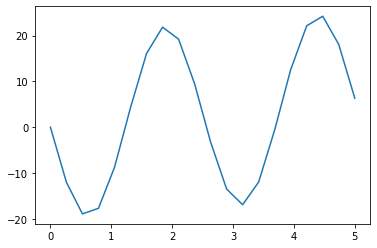

In [45]:
plt.plot(x, fx)
plt.show()

In [48]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

error([3.00000377, -2.4998895])

0.07203815082295684

In [47]:
from scipy.optimize import approx_fprime

u = np.array(200)

minimize(error, (-1,0), method='COBYLA')

     fun: 0.07203836756863868
   maxcv: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 168
  status: 1
 success: True
       x: array([ 3.00000377, -2.4998895 ])

### Задание 4

Создайте собственную дискретную случайную величину с 20 значениями. Сгенерируйте 1000 выборок размера 50. Посчитайте среднее для каждой выборки. Постройте гистограмму распределения средних.

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Elements')]

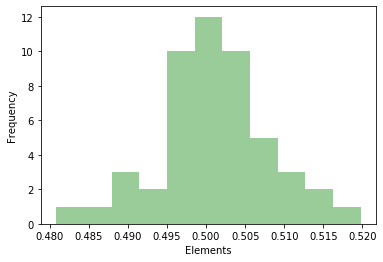

In [56]:
import seaborn

elements = np.random.random(20)
probabilities = [1/20 for x in range(20)]
mean_data = []
for i in range(50):
    data = np.random.choice(elements, 1000, p=probabilities)
    mean_data.append(data.mean())

ax=seaborn.distplot(mean_data,
                kde=False,
                color='green')
ax.set(xlabel='Elements',ylabel='Frequency')

### Задание 5

Найдите собственные значения и собственные вектора матрицы (на python и на бумаге)

[[1, 4],

 [1, 1]]

In [34]:
from sympy import *

matrix = np.array([[1, 4], [1, 1]])

In [35]:
w, v = np.linalg.eig(matrix)

for i in range(len(w)):
    print("Собственное значение " + str(w[i]))
    print("соответствующий ему собственный вектор " + str(v[:,i]))

Собственное значение 3.0000000000000004
соответствующий ему собственный вектор [0.89442719 0.4472136 ]
Собственное значение -0.9999999999999996
соответствующий ему собственный вектор [-0.89442719  0.4472136 ]


(1-l)(1-l)-1 * 4 = 0
1-2l+l^2 - 4 = 0
l^2 - 2l - 4 = 0

D = 4-4*1*-4 = 20

x1 = (2+4.47)/2 = 3 (примерно)
x2 = (2-4.47)/2 = -1 (примерно)

-2x+4y=0
x-2y=0

x=2y
x=2y

y=1
x=2

Собственное значение 3 (2, 1)

2x+4y=0
x+2y=0

x=-2y
x=-2y

y=-1
x=2

Собственное значение -1 (2, -1)

ПС: Собственные вектора не совпадают с python, видимо, из-за округления чисел